# Python Jumpstart

The purpose of this chapter is to introduce *Jupyter notebook* files and to give a glimpse of how to use them to work with financial data.  

In particular, we will visualize stock index data to observe the leverage effect: when the market suffers losses, prices become more volatile.

We will move quickly without explaining all the details, so don't worry if you aren't able to follow everything.  It may be worth coming back to this after you have completed the *Basic Data Wrangling* part of the the book.

## What is a Jupyter Notebook?

The notebook format conveniently allows you to combine sentences, code, code outputs (including plots), and mathematical notation.  Notebooks have proven to be a convenient and productive programming environment for data analysis.

Behind the scenes of a Jupyter notebook is a *kernel* that is responsible for executing computations.  The kernel can live locally on your machine or on a remote server.

## IDEs for Jupyter Notebooks

You will need another piece of software called an *integrated development environment* (IDE) to actually work with Jupyter notebooks; here are three popular and free IDEs for working with them:

1. [JupyterLab](https://jupyter.org/) - my personal favorite, created by the Jupyter project, which also creates the Jupyter notebook format.
2. [Jupyter Notebook Classic](https://jupyter.org/) - this was the predecessor to JupyterLab, also created by the Jupyter project.
3. [VSCode](https://code.visualstudio.com/) - an general purpose IDE created my Microsoft.

## Code Cells

A notebook is structured as a sequence of *cells*.  There are three kinds of cells: 1) *code* cells that contain code; 2) *markdown* cells that contain markdown or latex; and 3) *raw* cells that contain raw text.  We will work mainly with code cells and markdown cells.

The cell below is a code cell - try typing the code and then press **shift + enter**.

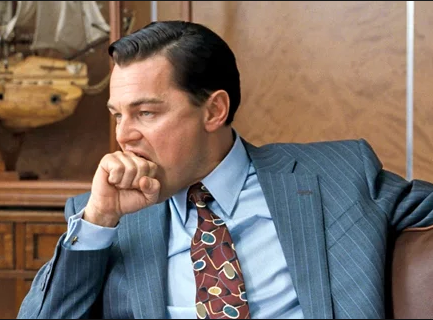

In [ ]:
from IPython.display import Image
Image("not_ethical.png")

## Edit Mode vs Command Mode

There are two modes in a notebook: 1) **edit** mode; 2) **command** mode.  

In **edit** mode you are *inside* a cell and you can edit the contents of the cell.  

In **command** mode, you are *outside* the cells and you can navigate between them.  

## Keyboard Shortcuts

Here are some of my favorite JupyterLab keyboard shortcuts:

edit mode: **enter**

command mode: **esc**

navigate up: **k**

navigate down: **j**

insert cell above: **a**

insert cell below: **b**

delete cell: **d, d** (press **d** twice)

switch to code cell: **y**

switch to markup cell: **m**

execute and stay on current cell: **ctrl + enter**

execute and move down a cell: **shift + enter**

## Drop Down Menus

Here are a few of the drop down menu functions in JupyterLab that I use frequently:

*Kernel > Restart Kernel and Clear All Outputs*

*Kernel > Restart Kearnel and Run All Cells*

*Run > Run All Above Selected Cell*

## Importing Packages

The power and convenience of Python as a data analysis language comes from the ecosystem of freely available third party packages.

Here are the packages that we will be using in this tutorial:

**numpy** - efficient vector and matrix computations

**pandas** - working with `DataFrames`

**yfinance** - reading in data from Yahoo finance

**pandas_datareader** - also for reading data from Yahoo Finance

The following code imports these packages and assigns them each an alias.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

## Reading-In Stock Data into a `DataFrame`

Let's begin by reading in 5 years of SPY price data from Yahoo Finance.  

SPY is an ETF that tracks the performace of the SP500 stock index.

In [ ]:
df_spy = pdr.get_data_yahoo('SPY', start='2014-01-01', end='2019-01-01')
df_spy = df_spy.round(2)
df_spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,183.98,184.07,182.48,182.92,153.83,119636900
2014-01-03,183.23,183.60,182.63,182.89,153.80,81390600
2014-01-06,183.49,183.56,182.08,182.36,153.36,108028200
2014-01-07,183.09,183.79,182.95,183.48,154.30,86144200
2014-01-08,183.45,183.83,182.89,183.52,154.33,96582300


Our stock data now lives in the variable called `df_spy`, which is a **pandas** data structure known as a `DataFrame`.  We can see this by using the following code:

In [ ]:
type(df_spy)

pandas.core.frame.DataFrame

## `DataFrame` Index

In **pandas**, a `DataFrame` always has an index.  For `df_spy` the `Dates` form the index.

In [ ]:
df_spy.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

I don't use indices very much, so let's make the `Date` index just a regular column.  Notice that we can modify `DataFrames` inplace.

In [ ]:
df_spy.reset_index(inplace=True)
df_spy

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,183.98,184.07,182.48,182.92,153.83,119636900
1,2014-01-03,183.23,183.60,182.63,182.89,153.80,81390600
2,2014-01-06,183.49,183.56,182.08,182.36,153.36,108028200
3,2014-01-07,183.09,183.79,182.95,183.48,154.30,86144200
4,2014-01-08,183.45,183.83,182.89,183.52,154.33,96582300
...,...,...,...,...,...,...,...
1253,2018-12-24,239.04,240.84,234.27,234.34,217.60,147311600
1254,2018-12-26,235.97,246.18,233.76,246.18,228.59,218485400
1255,2018-12-27,242.57,248.29,238.96,248.07,230.35,186267300
1256,2018-12-28,249.58,251.40,246.45,247.75,230.05,153100200


Notice that even though we ran the `.reset_index()` method of `df_spy` it still has an index; now its index is just a sequence of integers.

In [ ]:
df_spy.index

RangeIndex(start=0, stop=1258, step=1)

## A Bit of Cleaning

As a matter of preference, I like my column names to be in snake case.

In [ ]:
df_spy.columns = df_spy.columns.str.lower().str.replace(' ','_')
df_spy.head()

,date,open,high,low,close,adj_close,volume
0,2014-01-02,183.98,184.07,182.48,182.92,153.83,119636900
1,2014-01-03,183.23,183.60,182.63,182.89,153.80,81390600
2,2014-01-06,183.49,183.56,182.08,182.36,153.36,108028200
3,2014-01-07,183.09,183.79,182.95,183.48,154.30,86144200
4,2014-01-08,183.45,183.83,182.89,183.52,154.33,96582300


Let's also remove the columns that we won't need.  We first create a `list` of the column names that we want to get rid of and then we use the `DataFrame.drop()` method.

In [ ]:
lst_cols = ['high', 'low', 'open', 'close', 'volume',]
df_spy.drop(columns=lst_cols, inplace=True)
df_spy.head()

,date,adj_close
0,2014-01-02,153.83
1,2014-01-03,153.80
2,2014-01-06,153.36
3,2014-01-07,154.30
4,2014-01-08,154.33


Notice that trailing commas do not cause errors in Python.

## `Series`

You can isolate the columns of a `DataFrame` with square brackets as follows:

In [ ]:
df_spy['adj_close']

0       153.83
1       153.80
2       153.36
3       154.30
4       154.33
         ...  
1253    217.60
1254    228.59
1255    230.35
1256    230.05
1257    232.07
Name: adj_close, Length: 1258, dtype: float64

The columns of a `DataFrame` are a **pandas** data structure called a `Series`.

In [ ]:
type(df_spy['adj_close'])

pandas.core.series.Series

##  **numpy** and `ndarrays`

Python is a general purpose programming language and was not created for scientific computing in particular.  One of the foundational packages that makes Python well suited to scientific computing is **numpy**, which has a variety of features including a data type called `ndarrays`.  One of the benefits of `ndarrays` is that they allow for efficient vector and matrix computation.

The `values` of a `Series` object is a `numpy.ndarray`.  This is one sense in which **pandas** is *built on top of* `numpy`.

In [ ]:
df_spy['adj_close'].values

array([153.83, 153.8 , 153.36, ..., 230.35, 230.05, 232.07])

In [ ]:
type(df_spy['adj_close'].values)

numpy.ndarray

## `Series` Built-In Methods

`Series` have a variety of built-in methods that provide convenient summarization and modification functionality.  For example, you can `.sum()` all the elements of the `Series`.

In [ ]:
df_spy['adj_close'].sum()

251297.16

Next, we calculate the standard deviation of all the elements of the `Series` using the `.std()` method.

In [ ]:
df_spy['adj_close'].std()

33.16746781625381

The `.shift()` built-in method will be useful for calculating returns in the next section - it has the effect of *pushing down* the values in a `Series`.

In [ ]:
df_spy['adj_close'].shift()

0          NaN
1       153.83
2       153.80
3       153.36
4       154.30
         ...  
1253    223.51
1254    217.60
1255    228.59
1256    230.35
1257    230.05
Name: adj_close, Length: 1258, dtype: float64

## Calculating Daily Returns

Our analysis analysis of the leverage effect will involve daily returns for all the days in `df_spy`.  Let's calculate those now.

Recall that the end-of-day day $t$ return of a stock is defined as: $r_{t} = \frac{S_{t}}{S_{t-1}} - 1$, where $S_{t}$ is the stock price at end-of-day $t$.

Here is a vectorized approach to calculating all the daily returns in a single line of code.

In [ ]:
df_spy['ret'] = df_spy['adj_close'] / df_spy['adj_close'].shift(1) - 1
df_spy.head()

,date,adj_close,ret
0,2014-01-02,153.83,NaN
1,2014-01-03,153.80,-0.000195
2,2014-01-06,153.36,-0.002861
3,2014-01-07,154.30,0.006129
4,2014-01-08,154.33,0.000194


Notice that we can create a new column of a `DataFrame` by using variable assignment syntax.

## Visualizing Adjusted Close Prices

Python has a variety of packages that can be used for visualization.  In this chapter we will focus on built-in plotting capabilities of **pandas**.  These capabilities are built on top of the **matplotlib** package, which is the foundation of much of Python's visualization ecosystem.

`DataFrames` have a built-in `.plot()` method that makes creating simple line graphs quite easy.

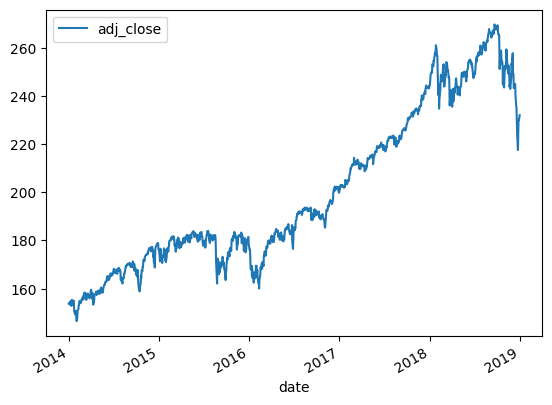

In [ ]:
df_spy.plot(x='date', y='adj_close');

If we wanted to make this graph more presentable we could do something like:

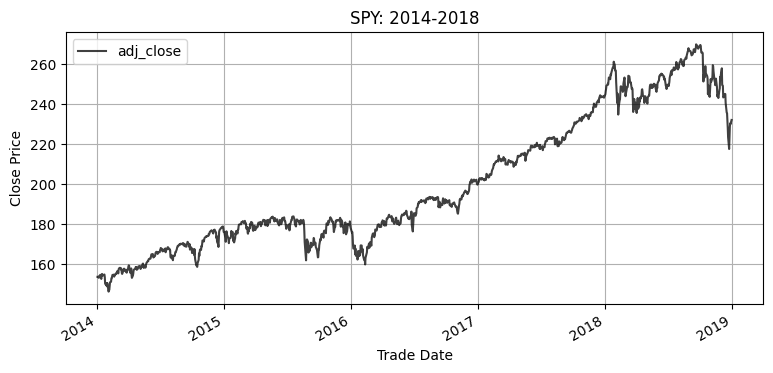

In [ ]:
ax = df_spy.\
        plot(
            x = 'date',
            y = 'adj_close',
            title = 'SPY: 2014-2018',
            grid = True,
            style = 'k',
            alpha = 0.75,
            figsize = (9, 4),
        );
ax.set_xlabel('Trade Date');
ax.set_ylabel('Close Price');

Notice that the `ax` variable created above is a `matplotlib` object.

In [ ]:
type(ax)

matplotlib.axes._axes.Axes

## Visualizing Returns

**pandas** also gives us the ability to simultaneously plot two different columns of a `DataFrame` in separate subplots of a single graph.  Here is what that code looks like:

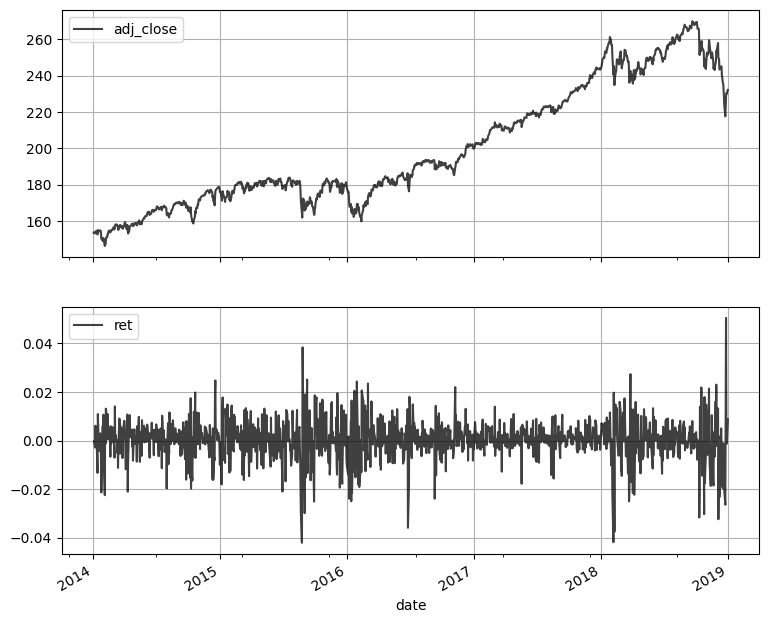

In [ ]:
df_spy.plot(x='date', y=['adj_close', 'ret',], subplots=True, style='k', alpha=0.75, figsize=(9, 8), grid=True);

The `returns` graph above is a bit of a hack, it doesn't really make sense to create a line graph of consecutive returns.  However, because there are so many days jammed into the x-axis, it creates a desirable effect and it used all the time in finance to demonstrate properties of volatility.

Notice that whenever there is a sharp drop in the `adj_close` price graph, that the magnitude of the nearby returns becomes large.  In contrast, during periods of steady growth (e.g. all of 2017) the magnitude of the returns is small.  This is precisely the leverage effect.

## Calculating Realized Volatility

Realized volatility is defined as the standard deviation of the daily returns; it indicates how much variability in the stock price there has been.  It is a matter of convention to annualize this quantity, so we multiply it by $\sqrt{252}$.

The following vectorized code calculates a rolling 2-month volatility for our SPY price data.

In [ ]:
df_spy['ret'].rolling(42).std() * np.sqrt(252)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    0.226735
1254    0.252813
1255    0.249195
1256    0.246019
1257    0.247027
Name: ret, Length: 1258, dtype: float64

Let's add these realized volatility calculations to`df_spy` this with the following code.

In [ ]:
df_spy['realized_vol'] = df_spy['ret'].rolling(42).std() * np.sqrt(252)
df_spy

,date,adj_close,ret,realized_vol
0,2014-01-02,153.83,NaN,NaN
1,2014-01-03,153.80,-0.000195,NaN
2,2014-01-06,153.36,-0.002861,NaN
3,2014-01-07,154.30,0.006129,NaN
4,2014-01-08,154.33,0.000194,NaN
...,...,...,...,...
1253,2018-12-24,217.60,-0.026442,0.226735
1254,2018-12-26,228.59,0.050506,0.252813
1255,2018-12-27,230.35,0.007699,0.249195
1256,2018-12-28,230.05,-0.001302,0.246019


## Visualizing Realized Volatility

We can easily add `realized_vol` to our graph with the following code.

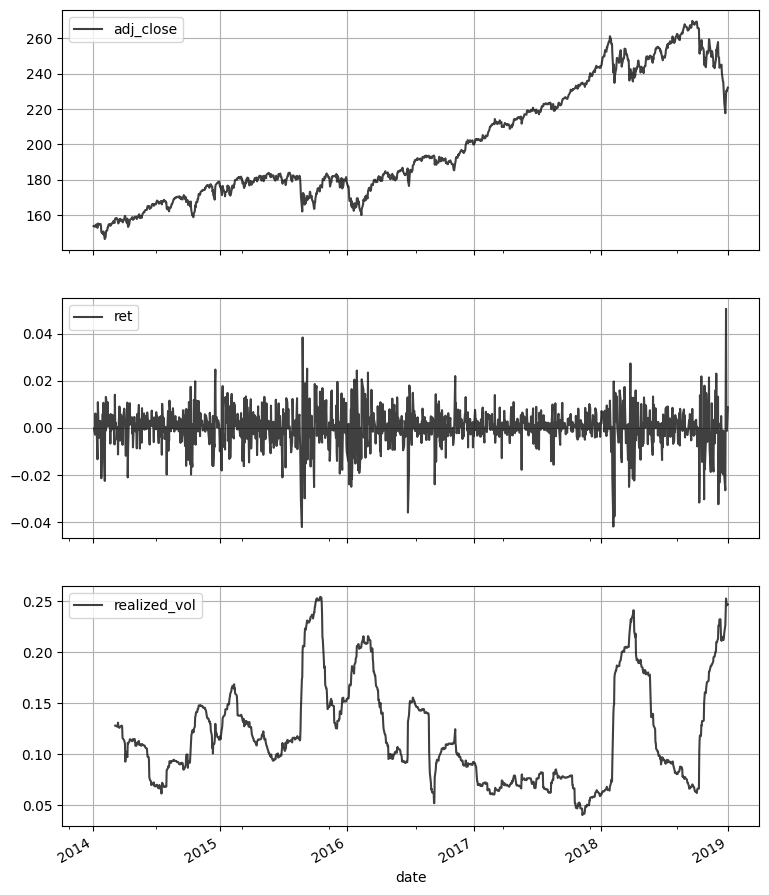

In [ ]:
df_spy.plot(x = 'date', 
            y = ['adj_close','ret','realized_vol',], 
            subplots=True, style='k', alpha=0.75, 
            figsize=(9, 12), 
            grid=True);

This graph is an excellent illustration of the leverage effect.  When SPY suffers losses, there is a spike in realized volatility, which is to say that the magnitude of the nearby returns increases.

## Further Reading

*Python Data Science Handbook* - Jake VanderPlas

*Python for Finance 2e* - Yves Hilpisch

*Python for Data Analysis 3e* - Wes McKinney